In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
import csv
import pandas as pd
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df_all = pd.read_csv('./data/different_slate_size.csv')

df_all['Precision (%)'] = df_all['Precision (%)'] * 100
df_all['Recall (%)'] = df_all['Recall (%)'] * 100

df_all

,Slate Size,Algorithm,Seed,Precision (%),Recall (%)
0,3,Random,0,0.745374,0.031163
1,4,Random,0,0.813135,0.039159
2,5,Random,0,0.741204,0.047449
3,6,Random,0,0.750586,0.054622
4,7,Random,0,0.712610,0.056833
...,...,...,...,...,...
115,6,List-CVAE,954358,26.392580,4.569956
116,7,List-CVAE,954358,25.259608,4.917397
117,8,List-CVAE,954358,25.377130,5.676790
118,9,List-CVAE,954358,24.556650,5.918217


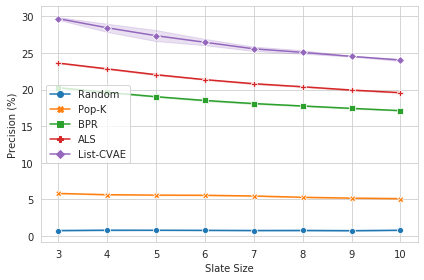

In [5]:
ax = sns.lineplot(x="Slate Size", y="Precision (%)", hue="Algorithm",
                  style="Algorithm", markers=True, dashes=False,
                  data=df_all)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("precision.pdf")

# Put the legend out of the figure
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

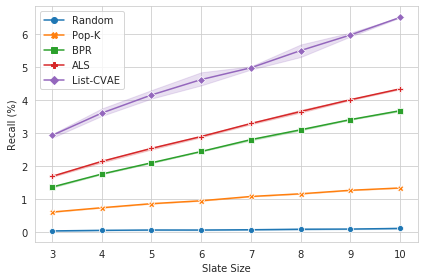

In [6]:
ax = sns.lineplot(x="Slate Size", y="Recall (%)", hue="Algorithm",
                  style="Algorithm", markers=True, dashes=False,
                  data=df_all)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("recall.pdf")

In [3]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fmri = sns.load_dataset("fmri")

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(fmri[fmri["subject"] == "s13"])

     subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
15       s13         17  stim  parietal -0.008265
29       s13         16  stim  parietal -0.002856
43       s13         15  stim  parietal -0.010971
57       s13         14  stim  parietal -0.033713
71       s13         13  stim  parietal -0.068637
85       s13         12  stim  parietal -0.100984
99       s13         11  stim  parietal -0.112575
113      s13         10  stim  parietal -0.074503
127      s13          9  stim  parietal  0.013245
140      s13          8  stim  parietal  0.130991
154      s13          7  stim  parietal  0.240747
168      s13          6  stim  parietal  0.291884
184      s13          5  stim  parietal  0.252627
197      s13          4  stim  parietal  0.136219
212      s13          3  stim  parietal  0.008418
226      s13          2  stim  parietal -0.062916
238      s13          1  stim  parietal -0.064256
252      s13          0  stim  parietal -0.042467


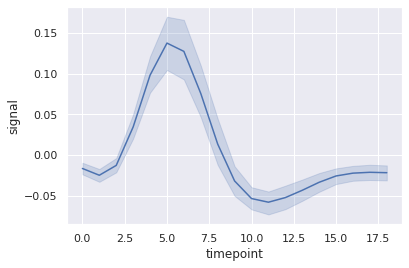

In [6]:
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)